In [20]:
'''
Packages necesarios
'''
import numpy as np
import matplotlib.pylab as plt

# Generación de los datos

In [21]:
'''
Se genera el dataset
'''
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Implementación de la arquitectura de una red FC

In [22]:
'''
Hiper-parametros
'''
input = X.shape[1]    # Número de entradas
data = X.shape[0]     # Número de datos
output = Y.shape[1]   # Número de salidas
learning_rate = 0.3   # Learning rate
iterations = 3000     # Número de iteraciones
layers = 3            # Número de capas

In [23]:
'''
Analiticas
'''
lost_evolution = []

# Arquitectura de la red

In [24]:
'''
0: Clasificación usando BCE
1: Regresión usando LSE
'''
net_type = 0

In [25]:
'''
Entradas:         2 neuronas
Capa de entrada:  2 neuronas
Capa oculta:      2 neuronas
Capa de salida:   1 neurona
'''
net_architecture = [input, 2, 2, output]

In [26]:
'''
Función de activación para cada capa
'''

'''
2: Función de activación tanh
1: Función de activación sigmoidal
0: Función de activación lineal
'''
net_function = [2, 2, 1]

In [27]:
'''
Inicialización de parametros
'''
bias = []             # Matriz de bias
weight = []           # Matriz de pesos
bias_gradient = []    # Matriz de gradientes de los bias
weight_gradient = []  # Matriz de gradientes de los pesos

In [28]:
for i in range(layers):   # Para recorrer cada capa de la red
  matrix_layer = np.random.rand(net_architecture[i + 1], net_architecture[i])
  weight.append(matrix_layer)

  matrix_gradient = np.zeros([net_architecture[i + 1], net_architecture[i]])
  weight_gradient.append(matrix_gradient)

  bias_matrix = np.random.rand(net_architecture[i + 1], 1)
  bias.append(bias_matrix)

  gradient_vector = np.zeros([net_architecture[i + 1], 1])
  bias_gradient.append(gradient_vector)

bias = np.array(bias, dtype=object)
weight = np.array(weight, dtype=object)
bias_gradient = np.array(bias_gradient, dtype=object)
weight_gradient = np.array(weight_gradient, dtype=object)

print(f"Matriz de bias:\n {bias}")
print(f"Matriz de pesos (weight):\n {weight}")
print(f"Matriz de gradientes de los bias:\n {bias_gradient}")
print(f"Matriz de gradientes de los pesos:\n {weight_gradient}")

Matriz de bias:
 [array([[0.20399879],
        [0.64405548]]) array([[0.21669076],
                              [0.11980795]]) array([[0.67903564]])]
Matriz de pesos (weight):
 [array([[0.57039734, 0.82761544],
        [0.11146741, 0.13380169]]) array([[0.32803082, 0.26310058],
                                          [0.85688958, 0.88834912]])
 array([[0.83894207, 0.61052699]])]
Matriz de gradientes de los bias:
 [array([[0.],
        [0.]]) array([[0.],
                      [0.]]) array([[0.]])]
Matriz de gradientes de los pesos:
 [array([[0., 0.],
        [0., 0.]]) array([[0., 0.],
                          [0., 0.]]) array([[0., 0.]])]


# Utilidades generales para la red neuronal

In [29]:
'''
Funciones de utilidad
'''
def get_net_type(net_type):
  if (net_type == 0):
    return "BCE"
  elif (net_type == 1):
    return "LSE"

def matrix_zeros(matrix, num_layer):
  for index in range(num_layer):
    matrix[index] = np.zeros((matrix[index].shape[0], matrix[index].shape[1]))

  return matrix

def extract_data(size, layer):
  X1 = np.zeros((1, size[0]))
  Y1 = np.zeros((1, size[1]))
  X1[0, :] = X[layer, :]
  Y1[0, :] = Y[layer, :]
  return [X1, Y1]

def activation_function(zp, act_fun):
  if(act_fun == 0):                       # Función de activación: lineal
    zp_activated = zp
  elif(act_fun == 1):                     # Función de activación: sigmoidal
    zp_activated = 1 / (1 + np.exp(-zp))
  else:                                   # Función de activación: tanh
    zp_activated = np.tanh(zp)
  return zp_activated

def prediction(w_in, bias_in, x_in, nl_in, l_in):
  transpose_matrix = np.vstack((np.transpose(x_in), np.ones((1, 1))))
  activated = []

  for layer in range(l_in):
    params_matrix = np.hstack((w_in[layer], bias_in[layer]))
    # Capa de entrada
    if (layer + 1 == 1):
      # Función de activación y actualización de pesos
      zp = np.dot(params_matrix, transpose_matrix)
    # Capas ocultas o de salida
    else:
      # Vector de la capa anterior
      activation_vector = np.vstack((activated[layer - 1], np.ones((1, 1))))
      # Función de activación y actualización de pesos
      zp = np.dot(params_matrix, activation_vector)

    activated.append(activation_function(zp, nl_in[layer]))

  return activated

# Función de activación en la capa de salida
def delta_output(Nl_delta, y_delta, output_delta):
  if(y_delta[0, 0]):
    lost = -1 / output_delta
  else:
    lost = 1 / (1 - output_delta)

  if(Nl_delta == 0):
    # Lineal
    delta = lost
  elif(Nl_delta == 1):
    # Sigmoidal
    delta = lost * (output_delta * (1 - output_delta))
  elif (Nl_delta == 2):
    # Tangente hiperbolico
    delta = lost * (1 - output_delta ** 2)

  return delta

def delta_layer(prev_delta, w_delta, Zl_delta, Nl_delta):
  delta_transpose = np.dot(np.transpose(w_delta), prev_delta)

  if(Nl_delta == 0):
    # Lineal
    delta = delta_transpose
  elif(Nl_delta == 1):
    # Sigmoidal
    delta = delta_transpose * (Zl_delta * (1 - Zl_delta))
  elif (Nl_delta == 2):
    # Tangente hiperbolico
    delta = delta_transpose * (1 - Zl_delta ** 2)

  return delta

# Desarrolle una función que permita propagar cada dato (Backpropagation)

In [30]:
for i in range(iterations):
  for j in range(data):
    X1, Y1 = extract_data([input, output], j)
    current_prediction = prediction(weight, bias, X1, net_function, layers)
    error_track = []

    '''
    Backpropagation
    '''
    for h in range(layers - 1, -1, -1):
      # Capa de salida
      if (h + 1 == layers):
        error = delta_output(net_function[h], Y1, current_prediction[h])
      # Las demás capas
      else:
        error = delta_layer(error, weight[h + 1], current_prediction[h], net_function[h])
      error_track.append(error)
    error_track.reverse()
    error_track = np.array(error_track, dtype=object)

    # Gradientes de los bias y los pesos
    for t in range(layers):
      bias_gradient[t] = bias_gradient[t] + error_track[t]
      # Capa de entrada
      if(t == 0):
        weight_gradient[t] = weight_gradient[t] + X1 * error_track[t]
      # Capa de salida y capas ocultas
      else:
        weight_gradient[t] = weight_gradient[t] + np.transpose(current_prediction[t - 1]) * error_track[t]

  '''
  Actualización
  '''
  for k in range(layers):
    bias[k] = bias[k] - (learning_rate / data) * (bias_gradient[k])
    weight[k] = weight[k] - (learning_rate / data) * weight_gradient[k]
  prediction_vector = []

  '''
  Función de perdida
  '''
  for a in range(data):
    evolution = 0
    X1, Y1 = extract_data([input, output], a)
    prediction_vector = prediction(weight, bias, X1, net_function, layers)

    if (net_type == 0):
      # Implementación de la fusión de perdida (BCE)
      if(Y1[0, 0]):
        evolution -= np.log(prediction_vector[layers - 1])
      else:
        evolution -= np.log(1 - prediction_vector[layers - 1])
    elif (net_type == 1):
      # Implementación de la fusión de perdida (LSE)
      evolution += (prediction_vector[layers - 1] - Y1[0, 0]) ** 2

  lost_evolution.append(evolution)

  '''
  Reincio del bucle - Limpieza de matrices
  '''
  weight_gradient = matrix_zeros(weight_gradient, layers)
  bias_gradient = matrix_zeros(bias_gradient, layers)

In [31]:
'''
Verificación de los resultados
'''
for j in range(data):
  X1, Y1 = extract_data([input, output], j)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  print(X1, Y1, current_prediction[layers - 1])

[[0. 0.]] [[0.]] [[0.00024154]]
[[0. 1.]] [[1.]] [[0.99889689]]
[[1. 0.]] [[1.]] [[0.99889664]]
[[1. 1.]] [[0.]] [[0.00221035]]


# Analiticas del rendimiento

In [32]:
'''
Analiticas de rendimiento
'''
epochs = np.arange(1, iterations + 1, 1)
loss = np.concatenate(lost_evolution)

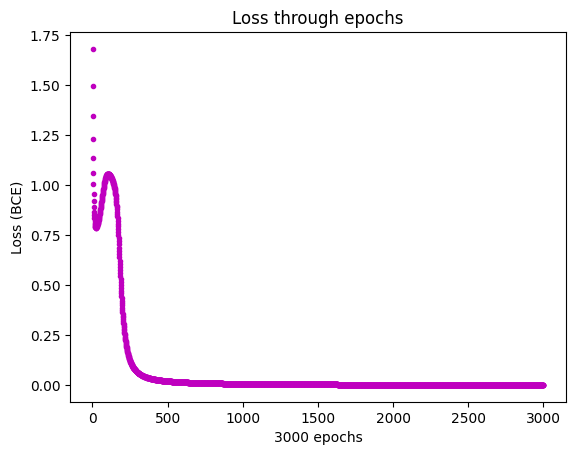

In [33]:
'''
Graficas sobre el rendimiento
'''
plt.plot(epochs, loss, '.m')
plt.ylabel(f"Loss ({get_net_type(net_type)})")
plt.xlabel(f"{iterations} epochs")
plt.title("Loss through epochs")
plt.show()

In [34]:
'''
Extrayendo caracteristicas para la matriz de confusión
'''
unique_tags = np.unique(np.concatenate(Y))
confusion_matrix = np.zeros((unique_tags.shape[0], unique_tags.shape[0]))

for j in range(data):
  X1, Y1 = extract_data([input, output], j)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  predicted_tag = current_prediction[layers - 1][0][0]
  rounded_tag = np.round(predicted_tag)

  '''
  Para la construcción de la matriz de confusión (El grafico)
  '''
  for tag in range(unique_tags.shape[0]):
    if (rounded_tag == unique_tags[tag]):
      if (Y1[0][0] == rounded_tag):
        confusion_matrix[tag][tag] += 1
      else:
        for fix in range(unique_tags.shape[0]):
          confusion_matrix[tag][fix] += 1
        confusion_matrix[tag][tag] -= 1

# Mostrando la matriz en números
print(confusion_matrix)

[[2. 0.]
 [0. 2.]]


In [35]:
'''
Otras analisticas extraidas de la matriz de confusión
'''

TP = confusion_matrix[1][1] # True Positive
TN = confusion_matrix[0][0] # True Negative
FP = confusion_matrix[0][1] # False Positive
FN = confusion_matrix[1][0] # False Negative

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensitivity}")
print(f"Especificidad: {specificity}")
print(f"Exactitud: {accuracy}")
print(f"F1 Score: {f1_score}")

Precisión: 1.0
Sensibilidad: 1.0
Especificidad: 1.0
Exactitud: 1.0
F1 Score: 1.0


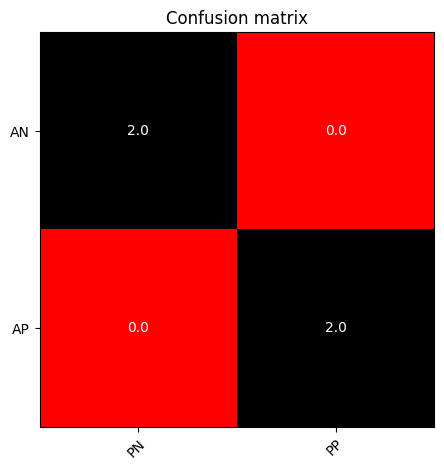

In [36]:
actual_label = ["AN", "AP"]
predicted_label = ["PN", "PP"]

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap=plt.colormaps["flag"].resampled(7))

# Para agregar los labels
ax.set_xticks(np.arange(len(predicted_label)), labels=predicted_label)
ax.set_yticks(np.arange(len(actual_label)), labels=actual_label)


# Para centrar los textos
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Para poner los números a cada recuadro.
for i in range(len(predicted_label)):
    for j in range(len(actual_label)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="w")

ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

In [37]:
expected = Y.flatten()
prediction_to_analize = []

for j in range(data):
  X1, Y1 = extract_data([input, output], j)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  prediction_to_analize.append(current_prediction[layers - 1].flatten()[0])

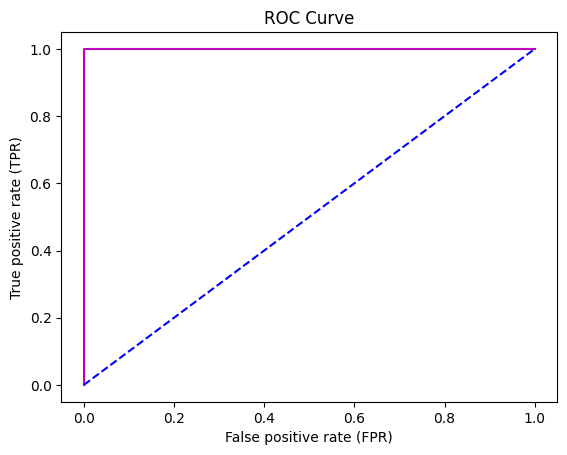

In [38]:
# Se define un vector de umbrales
thresholds = np.arange(0, 1.1, 0.1)

'''
Calculo de FPR y TPR como rates
'''
tpr = []
fpr = []
for threshold in thresholds:
    tpr.append(np.sum(expected & (prediction_to_analize >= threshold)) / np.sum(expected))
    fpr.append(np.sum((expected == 0) & (prediction_to_analize >= threshold)) / np.sum(expected == 0))

auc = np.trapz(tpr, fpr)

plt.plot(fpr, tpr, "-m", label=f"ROC de {auc} (AUC)")
plt.plot(thresholds, thresholds, "--b", label="Peor curva")
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title("ROC Curve")
plt.show()